#**Deep Learning Assignemnt-2**
# Denster Joseph Frank
# s3894695
# s3894695@student.rmit.edu.au

# Importing the Libraries

In [137]:
import tensorflow as tf
AUTOTUNE = tf.data.experimental.AUTOTUNE
import numpy as np
import pandas as pd

import tensorflow_datasets as tfds
import pathlib
import shutil
import tempfile
import re
from  IPython import display
from matplotlib import pyplot as plt
import seaborn as sns
import nltk
from nltk.corpus import stopwords
nltk.download('stopwords')
import pandas as pd
from wordcloud import WordCloud
import matplotlib.pyplot as plt
from nltk.tokenize import word_tokenize
nltk.download('punkt')



[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

# Reading Data

In [138]:
#Load train data
tweet_data_train= pd.read_csv('/content/drive/MyDrive/Deep_Learning/StanceDataset/StanceDataset/train.csv',lineterminator='\r',encoding = 'unicode_escape')
tweet_data_test= pd.read_csv('/content/drive/MyDrive/Deep_Learning/StanceDataset/StanceDataset/test.csv',lineterminator='\r',encoding = 'unicode_escape')

## Training Data

In [139]:
# To see first 5 items of the dataframe
tweet_data_train.head()

Tweet           Target  \
0  @tedcruz And, #HandOverTheServer she wiped cle...  Hillary Clinton   
1  Hillary is our best choice if we truly want to...  Hillary Clinton   
2  @TheView I think our country is ready for a fe...  Hillary Clinton   
3  I just gave an unhealthy amount of my hard-ear...  Hillary Clinton   
4  @PortiaABoulger Thank you for adding me to you...  Hillary Clinton   

    Stance                                    Opinion Towards Sentiment  
0  AGAINST  1.  The tweet explicitly expresses opinion abo...       neg  
1    FAVOR  1.  The tweet explicitly expresses opinion abo...       pos  
2  AGAINST  1.  The tweet explicitly expresses opinion abo...       neg  
3  AGAINST  1.  The tweet explicitly expresses opinion abo...       neg  
4     NONE  3.  The tweet is not explicitly expressing opi...       pos

In [140]:
# To find shape of dataframe
tweet_data_train.shape

(2914, 5)

## Testing Data

In [141]:
# To see first 5 items of the dataframe
tweet_data_test.head()

Tweet   Target   Stance  \
0  He who exalts himself shall      be humbled; a...  Atheism  AGAINST   
1  RT @prayerbullets: I remove Nehushtan -previou...  Atheism  AGAINST   
2  @Brainman365 @heidtjj @BenjaminLives I have so...  Atheism  AGAINST   
3  #God is utterly powerless without Human interv...  Atheism  AGAINST   
4  @David_Cameron   Miracles of #Multiculturalism...  Atheism  AGAINST   

                                     Opinion Towards Sentiment  
0  1.  The tweet explicitly expresses opinion abo...       pos  
1  1.  The tweet explicitly expresses opinion abo...     other  
2  1.  The tweet explicitly expresses opinion abo...       pos  
3  1.  The tweet explicitly expresses opinion abo...       neg  
4  2. The tweet does NOT expresses opinion about ...       neg

In [142]:
# To find shape of dataframe
tweet_data_test.shape

(1956, 5)

The dataset provided consists of a collection of tweets with associated metadata, primarily centered around opinions and stances towards Hillary Clinton. The DataFrame contains five key columns: "Tweet," "Target," "Stance," "Opinion Towards," and "Sentiment."With a training dataset of (2914, 5) and a test dataset of (1956, 5), this dataset is well-suited for tasks such as sentiment analysis

# Text Cleaning

## To convert text to lower case

In [143]:
def to_lower(text):
    return text.lower()

## To remove URL or any website from the Text

In [144]:
def remove_urls(text):
    url_pattern = re.compile(r'https?://\S+|www\.\S+')
    return url_pattern.sub('', text)

## To remove special character from the Text

In [145]:
def remove_special_characters(text):
    special_characters_pattern = re.compile(r'[^a-zA-Z0-9\s]')
    return special_characters_pattern.sub('', text)

## To remove number from the Text

In [146]:
def remove_numbers(tweet):
    digits = '[0-9]'
    return re.sub(digits, '', tweet)

## To remove extraa space from Text

In [147]:
def remove_extra_spaces(tweet):
    return re.sub(r"\s+"," ",tweet)

## To remove short word from the Text

In [148]:
def remove_short_words(tweet):
    return re.sub(r'\b\w{1,2}\b', '',tweet)

## To remove emoji from the Text

In [149]:
def remove_emojis(text):
    emoji_pattern = re.compile("["
                               u"\U0001F600-\U0001F64F"  # Emoticons
                               u"\U0001F300-\U0001F5FF"  # Symbols & Pictographs
                               u"\U0001F680-\U0001F6FF"  # Transport & Map Symbols
                               u"\U0001F700-\U0001F77F"  # Alphabetic Presentation Forms
                               u"\U0001F780-\U0001F7FF"  # Geometric Shapes Extended
                               u"\U0001F800-\U0001F8FF"  # Supplemental Arrows-C
                               u"\U0001F900-\U0001F9FF"  # Supplemental Symbols and Pictographs
                               u"\U0001FA00-\U0001FA6F"  # Chess Symbols
                               u"\U0001FA70-\U0001FAFF"  # Symbols and Pictographs Extended-A
                               u"\U0001FB00-\U0001FBFF"  # Symbols for Legacy Computing
                               u"\U0001FC00-\U0001FCFF"  # Symbols for Legacy Computing
                               u"\U0001F004-\U0001F0CF"  # Additional emoticons
                               u"\U0001F170-\U0001F251"  # Enclosed characters
                               "]+", flags=re.UNICODE)
    return emoji_pattern.sub(r'', text)

In [150]:
def pre_processing(text):

    #text = remove_urls(text)
    text =remove_special_characters(text)
    text =remove_numbers(text)
    text =remove_extra_spaces(text)
    text =remove_short_words(text)
    text =remove_emojis(text)
    text = to_lower(text)
    return text

In [151]:
tweet_data_train["Tweet"]=tweet_data_train["Tweet"].apply(pre_processing)
tweet_data_test["Tweet"]=tweet_data_test["Tweet"].apply(pre_processing)

In [152]:
tweet_data_train["Tweet"]

0       tedcruz and handovertheserver she wiped clean ...
1       hillary  our best choice   truly want  continu...
2       theview  think our country  ready for  female ...
3        just gave  unhealthy amount   hardearned mone...
4         portiaaboulger thank you for adding   your list
                              ...                        
2909    theres  law protecting unborn eagles but not h...
2910        have had  abortion abortionondemand menstr...
2911    how dare you say  sexual preference   choice h...
2912    equal rights for those born that way  rights f...
2913    potus seals his legacy  doz wins the gop agend...
Name: Tweet, Length: 2914, dtype: object

In [153]:
tweet_data_test["Tweet"]

0        who exalts himself shall  humbled and  who hu...
1        prayerbullets  remove nehushtan previous move...
2       brainman heidtjj benjaminlives  have sought th...
3       god  utterly powerless without human intervent...
4       davidcameron miracles  multiculturalism miracl...
                              ...                        
1951    realdonaldtrump  all want you  the next presid...
1952    rsherman join twitter trump brigade onethousan...
1953    joeybats join twitter trump brigade onethousan...
1954    trumps outlandish statements  political strate...
1955    rmconservative dagnyred   out  controlstop bei...
Name: Tweet, Length: 1956, dtype: object

# Exploratory Data Analysis (EDA)

## By Stance:

In [154]:
# To check types of stances
print(tweet_data_train['Stance'].unique())

['AGAINST' 'FAVOR' 'NONE']


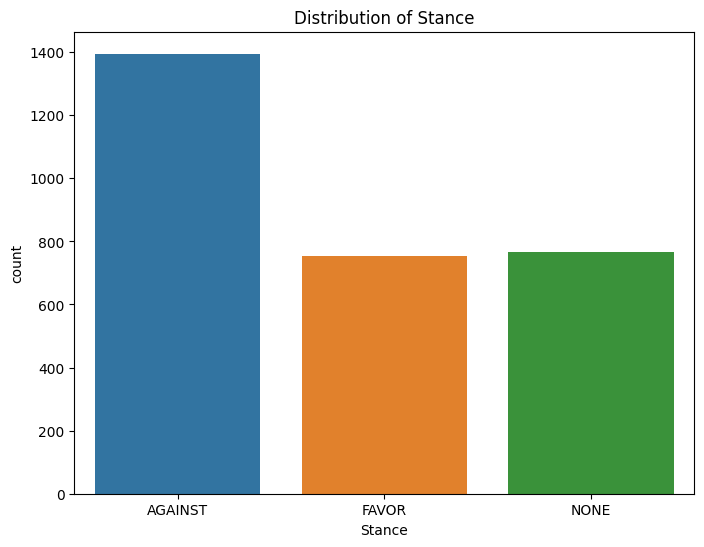

In [155]:
plt.figure(figsize=(8, 6))
sns.countplot(x='Stance', data=tweet_data_train)
plt.title('Distribution of Stance')
plt.show()

## By Target:

In [156]:
# To check types of Target
print(tweet_data_train['Target'].unique())

['Hillary Clinton' 'Legalization of Abortion' 'Atheism'
 'Climate Change is a Real Concern' 'Feminist Movement']


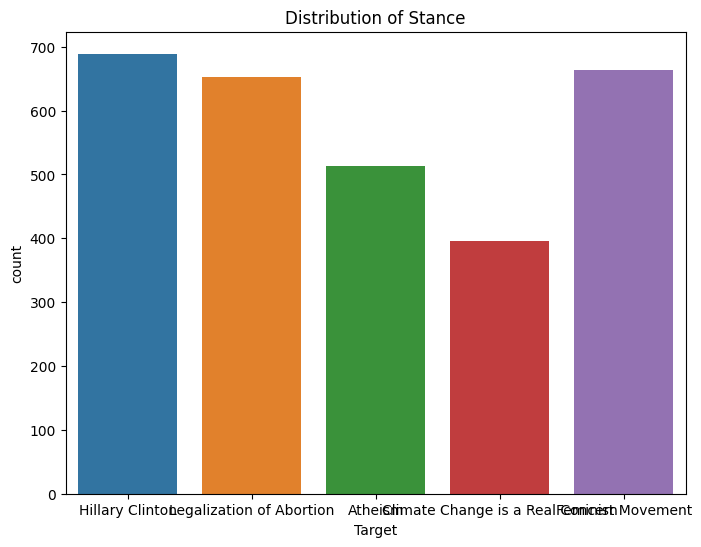

In [157]:
plt.figure(figsize=(8, 6))
sns.countplot(x='Target', data=tweet_data_train)
plt.title('Distribution of Stance')
plt.show()

## By Sentiment:

In [158]:
# To check types of Sentiment
print(tweet_data_train['Sentiment'].unique())

['neg' 'pos' 'other']


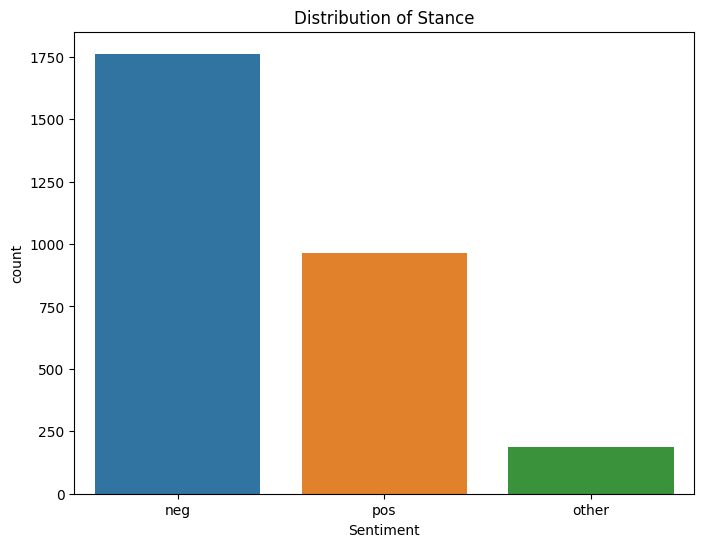

In [159]:
plt.figure(figsize=(8, 6))
sns.countplot(x='Sentiment', data=tweet_data_train)
plt.title('Distribution of Stance')
plt.show()

## To Plot the relation between Stance vs Sentiment and Opinion towards

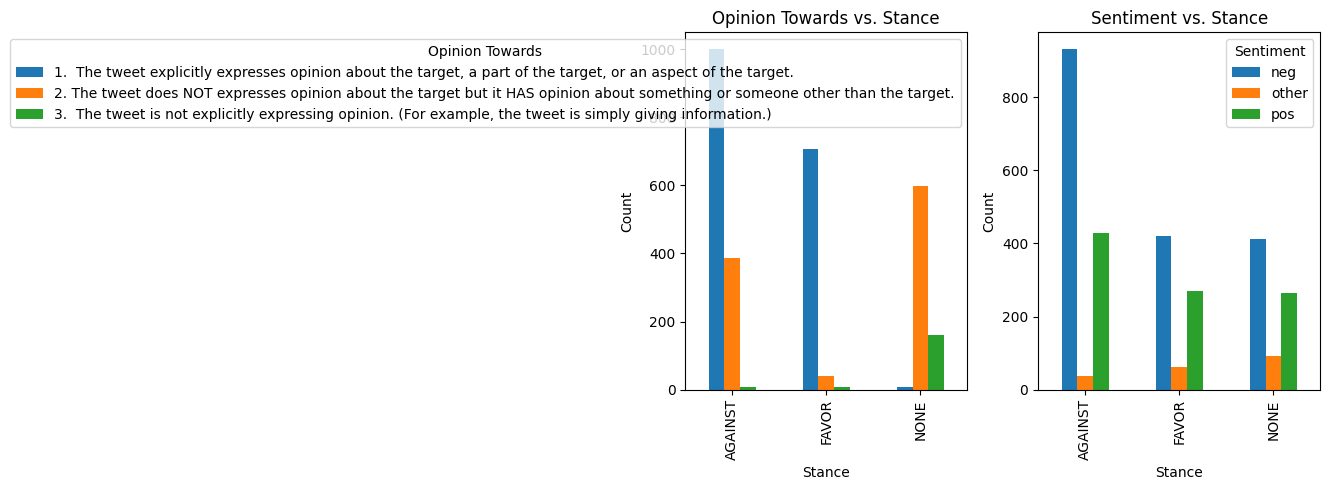

In [160]:
# Group by "Opinion Towards" and "Stance" and count the occurrences
opinion_stance_counts = tweet_data_train.groupby(['Opinion Towards', 'Stance']).size().reset_index(name='Count')

# Group by "Sentiment" and "Stance" and count the occurrences
sentiment_stance_counts = tweet_data_train.groupby(['Sentiment', 'Stance']).size().reset_index(name='Count')

# Create subplots for the two bar graphs
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5))

# Plot the Opinion Towards vs. Stance relationship
opinion_stance_counts.pivot(index='Stance', columns='Opinion Towards', values='Count').plot(kind='bar', ax=ax1)
ax1.set_title('Opinion Towards vs. Stance')
ax1.set_ylabel('Count')

# Plot the Sentiment vs. Stance relationship
sentiment_stance_counts.pivot(index='Stance', columns='Sentiment', values='Count').plot(kind='bar', ax=ax2)
ax2.set_title('Sentiment vs. Stance')
ax2.set_ylabel('Count')

# Adjust layout
plt.tight_layout()

# Show the plots
plt.show()

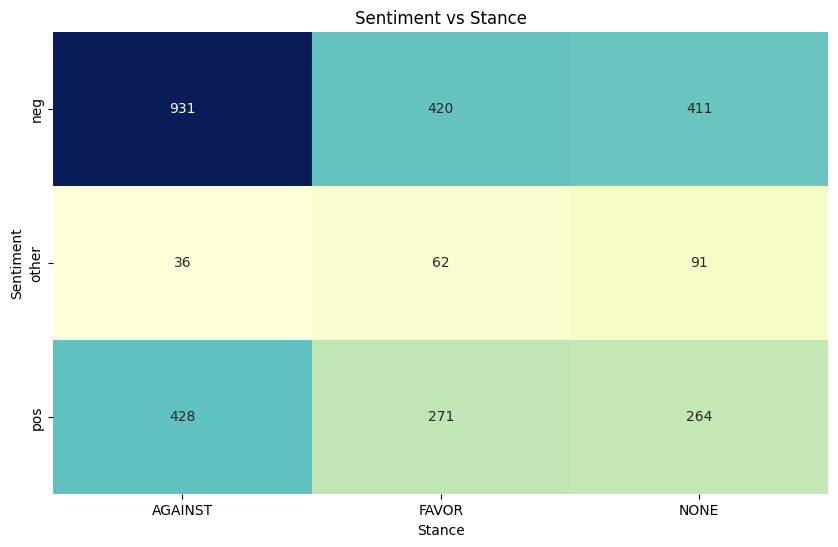

In [161]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming you have a DataFrame named 'df' containing the data
# If not, load your data into a DataFrame first

# Create a contingency table
contingency_table = pd.crosstab(tweet_data_train['Sentiment'], tweet_data_train['Stance'])

# Create a heatmap to visualize the relationship
plt.figure(figsize=(10, 6))
sns.heatmap(contingency_table, annot=True, cmap='YlGnBu', fmt='d', cbar=False)
plt.title('Sentiment vs Stance')
plt.show()


### Word Cloud for Tweet with respective to Target Attribute

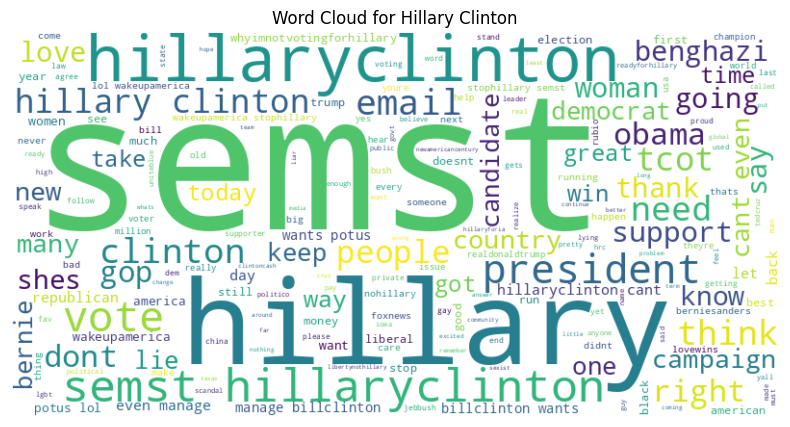

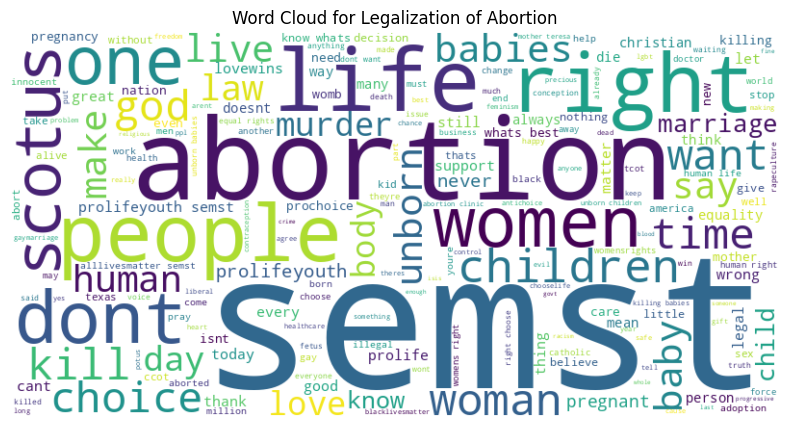

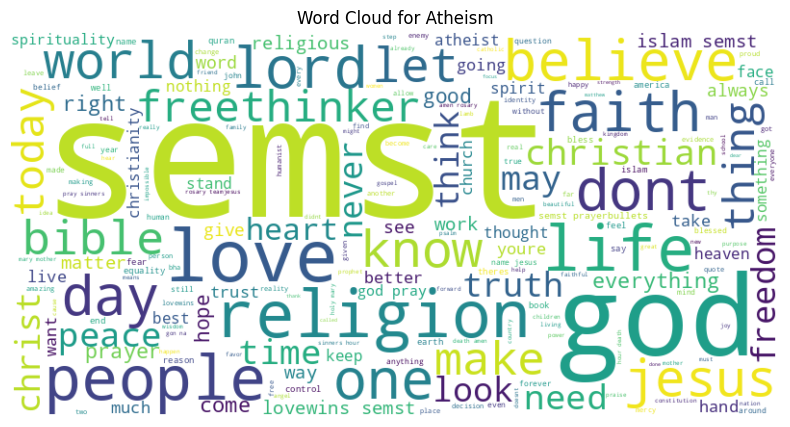

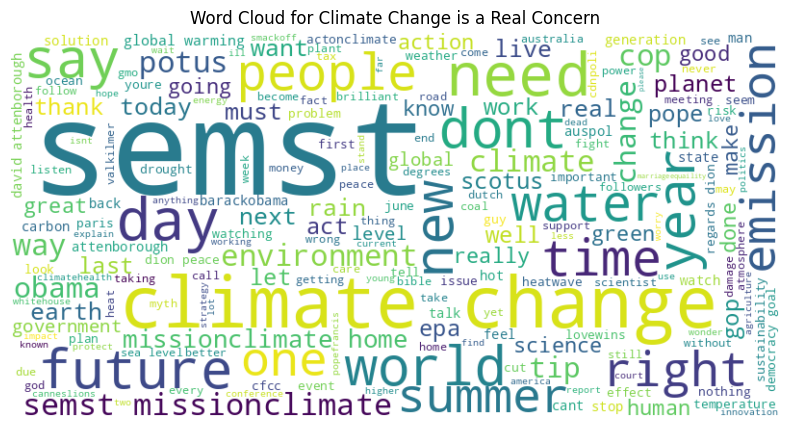

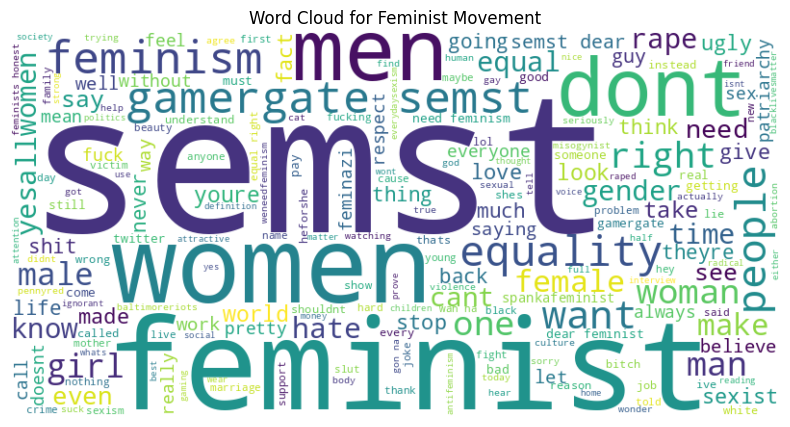

In [162]:


# Define targets
targets = tweet_data_train['Target'].unique()

# Iterate through targets
for target in targets:
    # Extract tweets for the specific target
    target_tweets = tweet_data_train[tweet_data_train['Target'] == target]['Tweet']

    # Join all the tweets for the target into a single string
    all_tweets = ' '.join(target_tweets)

    # Preprocess the text
    all_tweets = all_tweets.lower()
    all_tweets = ''.join([char for char in all_tweets if char.isalnum() or char.isspace()])
    all_words = word_tokenize(all_tweets)
    all_words = [word for word in all_words if word not in stopwords.words('english')]

    # Generate the word cloud
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate(' '.join(all_words))

    # Plot the word cloud
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.title(f'Word Cloud for {target}')
    plt.axis('off')
    plt.show()


### Word Cloud for Tweet with respective to Sentiment

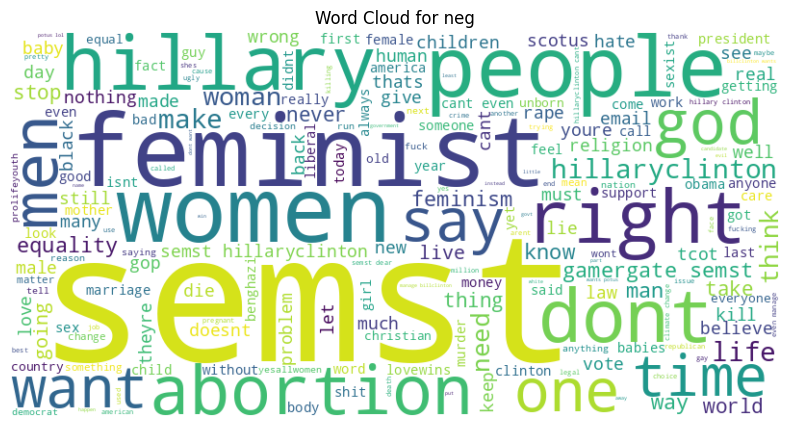

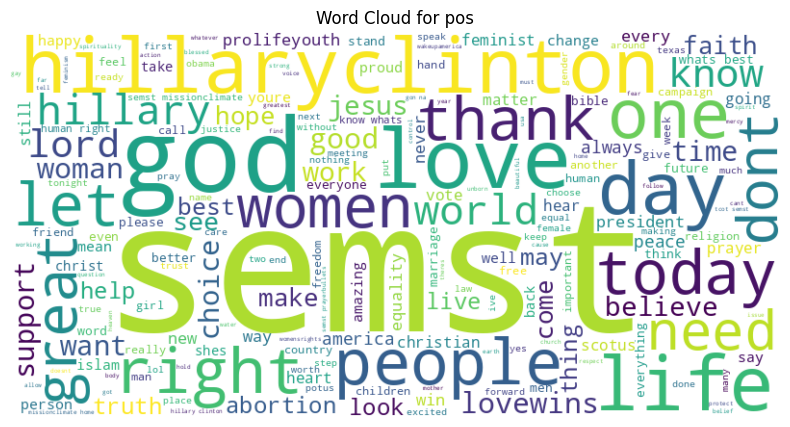

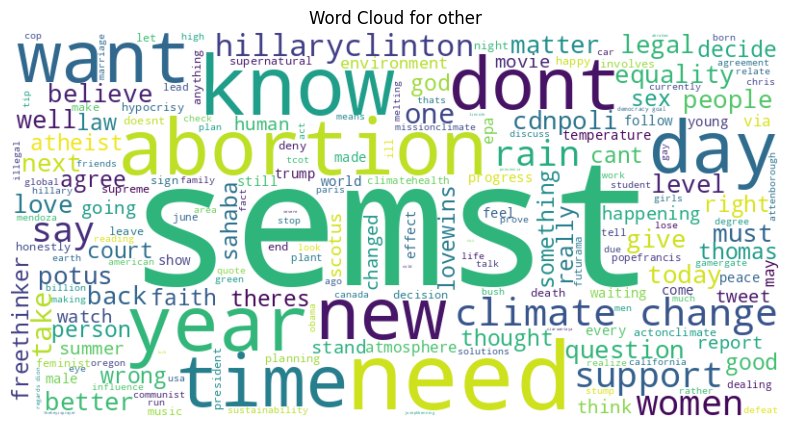

In [163]:
# Define targets
targets = tweet_data_train['Sentiment'].unique()

# Iterate through targets
for target in targets:
    # Extract tweets for the specific target
    target_tweets = tweet_data_train[tweet_data_train['Sentiment'] == target]['Tweet']

    # Join all the tweets for the target into a single string
    all_tweets = ' '.join(target_tweets)

    # Preprocess the text
    all_tweets = all_tweets.lower()
    all_tweets = ''.join([char for char in all_tweets if char.isalnum() or char.isspace()])
    all_words = word_tokenize(all_tweets)
    all_words = [word for word in all_words if word not in stopwords.words('english')]

    # Generate the word cloud
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate(' '.join(all_words))

    # Plot the word cloud
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.title(f'Word Cloud for {target}')
    plt.axis('off')
    plt.show()

### Word Cloud for Tweet with respective to Stance

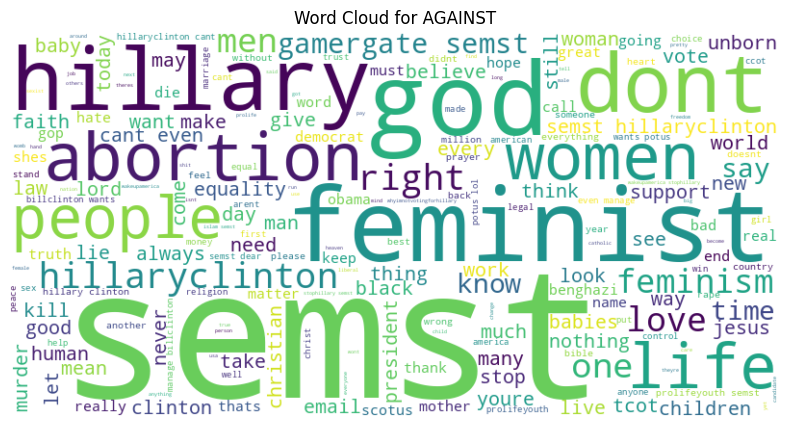

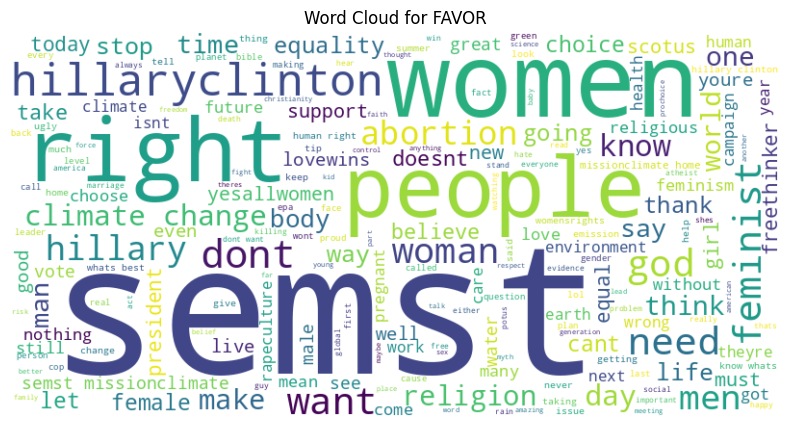

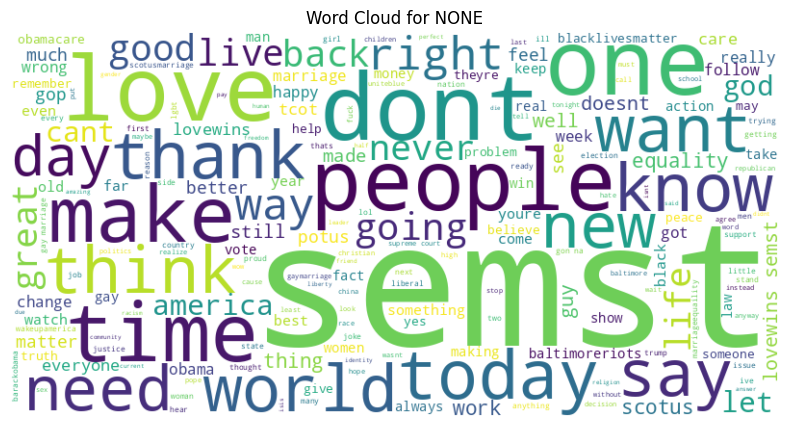

In [164]:
# Define targets
targets = tweet_data_train['Stance'].unique()

# Iterate through targets
for target in targets:
    # Extract tweets for the specific target
    target_tweets = tweet_data_train[tweet_data_train['Stance'] == target]['Tweet']

    # Join all the tweets for the target into a single string
    all_tweets = ' '.join(target_tweets)

    # Preprocess the text
    all_tweets = all_tweets.lower()
    all_tweets = ''.join([char for char in all_tweets if char.isalnum() or char.isspace()])
    all_words = word_tokenize(all_tweets)
    all_words = [word for word in all_words if word not in stopwords.words('english')]

    # Generate the word cloud
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate(' '.join(all_words))

    # Plot the word cloud
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.title(f'Word Cloud for {target}')
    plt.axis('off')
    plt.show()

# Pre Processing

In [165]:
tweet_data_train["Stance"]= tweet_data_train.Stance.map({
    "AGAINST" : 0,
    "FAVOR"  : 2,
    "NONE" : 1,
})

tweet_data_test["Stance"]= tweet_data_test.Stance.map({
    "AGAINST" : 0,
    "FAVOR"  : 2,
    "NONE" : 1,
})

In [166]:
unique_values = tweet_data_train["Stance"].unique()
print(unique_values)

[0 2 1]


In [167]:
tweet_data_train.head()

Tweet           Target  Stance  \
0  tedcruz and handovertheserver she wiped clean ...  Hillary Clinton       0   
1  hillary  our best choice   truly want  continu...  Hillary Clinton       2   
2  theview  think our country  ready for  female ...  Hillary Clinton       0   
3   just gave  unhealthy amount   hardearned mone...  Hillary Clinton       0   
4    portiaaboulger thank you for adding   your list  Hillary Clinton       1   

                                     Opinion Towards Sentiment  
0  1.  The tweet explicitly expresses opinion abo...       neg  
1  1.  The tweet explicitly expresses opinion abo...       pos  
2  1.  The tweet explicitly expresses opinion abo...       neg  
3  1.  The tweet explicitly expresses opinion abo...       neg  
4  3.  The tweet is not explicitly expressing opi...       pos

# Data Loader

## Training Data

In [168]:
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences

def data_loader_train(data):

  cleaned_tweet=data['Tweet'].tolist()
  cleaned_target=data['Target'].tolist()

  validation_split = 0.20
  max_length = 110

  tokenizer_obj_tweet = Tokenizer()
  tokenizer_obj_target = Tokenizer()
  tokenizer_obj_tweet.fit_on_texts(cleaned_tweet)
  tokenizer_obj_target.fit_on_texts(cleaned_target)
  sequences = tokenizer_obj_tweet.texts_to_sequences(cleaned_tweet)
  print(sequences)
  sequences_target=tokenizer_obj_target.texts_to_sequences(cleaned_target)
  word_index = tokenizer_obj_tweet.word_index
  print("unique tokens - "+str(len(word_index)))
  vocab_size = len(tokenizer_obj_tweet.word_index) + 1
  print('vocab_size - '+str(vocab_size))

  lines_pad = pad_sequences(sequences, maxlen=max_length, padding='post')
  target_pad=pad_sequences(sequences_target, maxlen=max_length, padding='post')
  category =  data["Stance"].values

  indices = np.arange(lines_pad.shape[0])
  np.random.shuffle(indices)
  lines_pad = lines_pad[indices]
  target_pad=target_pad[indices]
  category = category[indices]
  lines_pad = np.concatenate((lines_pad, target_pad), axis=1)
  n_values = np.max(category) + 1
  Y = np.eye(n_values)[category]

  num_validation_samples = int(validation_split * lines_pad.shape[0])

  X_train_pad = lines_pad[:-num_validation_samples]
  y_train = Y[:-num_validation_samples]
  X_val_pad = lines_pad[-num_validation_samples:]
  y_val = Y[-num_validation_samples:]

  # Randomly sample some train data
  train_len = X_train_pad.shape[0]

  idx = np.random.randint(train_len, size=train_len//25)

  X_train_pad_sampled = X_train_pad[idx, :]
  y_train_sampled = y_train[idx]


  print('Shape of X_train_pad:', X_train_pad.shape)
  print('Shape of y_train:', y_train.shape)

  print('Shape of X_train_pad_sampled:', X_train_pad_sampled.shape)
  print('Shape of y_train_sampled:', y_train_sampled.shape)

  print('Shape of X_val_pad:', X_val_pad.shape)
  print('Shape of y_val:', y_val.shape)
  return word_index,X_train_pad,y_train,X_train_pad_sampled,y_train_sampled,X_val_pad,y_val

In [169]:
word_index,X_train_pad,y_train,X_train_pad_sampled,y_train_sampled,X_val_pad,y_val=data_loader_train(tweet_data_train)

[[709, 4, 3192, 48, 3193, 1428, 953, 198, 1963, 3194, 3195, 3196, 100], [28, 41, 105, 152, 567, 47, 475, 62, 1429, 280, 1147], [3197, 64, 41, 187, 247, 5, 234, 1964, 56, 163, 28], [26, 568, 3198, 1430, 3199, 235, 306, 2, 307, 339, 3200, 3201, 432], [3202, 140, 3, 5, 1431, 11, 1148], [28, 25, 8, 236, 1432, 1965, 2, 1433, 819, 145, 433, 29, 1434, 1434], [289, 5, 2, 237, 4, 289, 2, 237, 213, 1149, 3203, 434], [17, 47, 3204, 1966, 820], [400, 18, 53, 67, 69, 10, 1435, 4, 1967, 60, 109, 5, 317, 69, 90], [18, 214, 1968, 1436, 954, 3205, 267, 1969, 955, 268, 18], [238, 11, 956, 158, 28, 45, 2, 372, 3206], [18, 28, 3207, 10, 34, 1437, 1970, 957], [1438, 18, 18, 2, 1971, 3208, 2, 958, 23, 33, 821, 2, 57], [3209, 1972, 3, 50, 317, 51], [822, 1973, 569, 318, 18, 432], [1974, 188, 3210, 4, 1975, 3211, 3212, 1439, 3213], [1976, 2, 215, 1977, 2, 145, 476, 247, 823, 106, 28, 1978], [14, 1979, 1980, 290, 17, 373, 248, 199, 27, 959, 5, 570], [3214, 3215, 42, 25, 127, 164], [28, 101, 47, 249, 225, 1981,

## Testing Data

In [170]:
def data_loader_test(data):

  cleaned_tweet=data['Tweet'].tolist()
  cleaned_target=data['Target'].tolist()

  validation_split = 0.01
  max_length = 110

  tokenizer_obj_tweet = Tokenizer()
  tokenizer_obj_target = Tokenizer()
  tokenizer_obj_tweet.fit_on_texts(cleaned_tweet)
  tokenizer_obj_target.fit_on_texts(cleaned_target)
  sequences = tokenizer_obj_tweet.texts_to_sequences(cleaned_tweet)
  print(sequences)
  sequences_target=tokenizer_obj_target.texts_to_sequences(cleaned_target)
  word_index = tokenizer_obj_tweet.word_index
  print("unique tokens - "+str(len(word_index)))
  vocab_size = len(tokenizer_obj_tweet.word_index) + 1
  print('vocab_size - '+str(vocab_size))

  lines_pad = pad_sequences(sequences, maxlen=max_length, padding='post')
  target_pad=pad_sequences(sequences_target, maxlen=max_length, padding='post')
  category =  data["Stance"].values

  indices = np.arange(lines_pad.shape[0])
  np.random.shuffle(indices)
  lines_pad = lines_pad[indices]
  target_pad=target_pad[indices]
  category = category[indices]
  lines_pad = np.concatenate((lines_pad, target_pad), axis=1)
  n_values = np.max(category) + 1
  Y = np.eye(n_values)[category]

  num_validation_samples = int(validation_split * lines_pad.shape[0])

  X_test_pad = lines_pad[:-num_validation_samples]
  y_test = Y[:-num_validation_samples]

  # Randomly sample some train data
  test_len = X_test_pad.shape[0]

  idx = np.random.randint(test_len, size=test_len//25)

  X_test_pad_sampled = X_test_pad[idx, :]
  y_test_sampled = y_test[idx]


  print('Shape of X_test_pad:', X_test_pad.shape)
  print('Shape of y_test:', y_test.shape)

  print('Shape of X_test_pad_sampled:', X_test_pad_sampled.shape)
  print('Shape of y_test_sampled:', y_test_sampled.shape)
  return X_test_pad,y_test,X_test_pad_sampled,y_test_sampled

In [171]:
X_test_pad,y_test,X_test_pad_sampled,y_test_sampled=data_loader_test(tweet_data_test)

[[23, 2377, 382, 802, 2378, 3, 23, 2379, 382, 802, 2380, 1], [2381, 1466, 2382, 2383, 1467, 32, 6, 14, 271, 2384, 36, 2, 416, 803, 2385, 1], [1468, 2386, 2387, 14, 2388, 2, 81, 383, 3, 1469, 352, 219, 196, 20, 108, 1470, 1], [32, 2389, 2390, 145, 151, 1471, 1], [2391, 1065, 2392, 1065, 2393, 2394, 2395, 2396, 2397, 2398, 2399, 1472, 1], [12, 83, 162, 804, 670, 1066, 804, 219, 2400, 75, 36, 15, 12, 2401, 3, 152, 2402, 1], [1473, 8, 2403, 36, 197, 2404, 2405, 2, 2406, 1474, 2407, 1], [2408, 805, 472, 4, 1067, 4, 806, 4, 2409, 4, 2410, 4, 1068, 4, 136, 4, 2411, 4, 32, 1], [2412, 198, 11, 2413, 2414, 1], [473, 180, 807, 1069, 384, 3, 2415, 1475, 32, 1070, 474, 81, 322, 1], [44, 808, 63, 128, 43, 20, 671, 2416, 2417, 1], [272, 548, 129, 47, 3, 41, 809, 549, 1071, 130, 1], [153, 181, 810, 1476, 3, 271, 352, 220, 56, 475, 2418, 1], [102, 182, 2, 811, 476, 7, 1477, 477, 1], [163, 51, 4, 672, 297, 69, 6, 35, 2419, 1072, 1478, 273, 417, 154, 146, 1479, 1], [2420, 3, 48, 65, 474, 57, 20, 2421, 41

# BaseLine Model

In [172]:
# Function to show accuracy of Traing, Testing and Validation
def accuracy(model,history):
  # Evaluate the model on Training data

  print("Training Loss for Stance:", history.history['loss'][-1])
  print("Training Stance Accuracy:", history.history['categorical_accuracy'][-1])
  # Evaluate the model on validation data
  print("Validation Loss for Stance:", history.history['val_loss'][-1])
  print("Validation Stance Accuracy:", history.history['val_categorical_accuracy'][-1])

  # Evaluate the model on testing data
  evaluation = model.evaluate(X_test_pad, y_test)
  print(evaluation)
  print("Testing Loss for Stance:", evaluation[0])
  print("Testing Stance Accuracy:", evaluation[1])

In [173]:
def plot_learning_curve(train_loss, val_loss, train_metric, val_metric, metric_name='Accuracy'):
    plt.figure(figsize=(10,5))

    plt.subplot(1,2,1)
    plt.plot(train_loss, 'r--')
    plt.plot(val_loss, 'b--')
    plt.xlabel("epochs")
    plt.ylabel("Loss")
    plt.legend(['train', 'val'], loc='upper left')

    plt.subplot(1,2,2)
    plt.plot(train_metric, 'r--')
    plt.plot(val_metric, 'b--')
    plt.xlabel("epochs")
    plt.ylabel(metric_name)
    plt.legend(['train', 'val'], loc='upper left')

    plt.show()

In [174]:
#Function to plot graph
def graph_plot(history):
  plot_learning_curve(history.history['loss'], history.history['val_loss'],
                    history.history['categorical_accuracy'], history.history['val_categorical_accuracy'],
                    metric_name='Accuracy')

In [175]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
def confusion_matrix_function(y_true, y_pred, class_names):
    # Calculate confusion matrix
    cm = confusion_matrix(y_true, y_pred)

    # Plot confusion matrix
    plt.figure()
    plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
    plt.title("Confusion Matrix")
    plt.colorbar()
    num_classes = len(class_names)
    plt.xticks(np.arange(num_classes), class_names)
    plt.yticks(np.arange(num_classes), class_names)
    thresh = cm.max() / 2

    for i in range(num_classes):
        for j in range(num_classes):
            plt.text(j, i, f'{cm[i, j]}', ha='center', va='center',
                     color='white' if cm[i, j] > thresh else 'black')

    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.show()


In [176]:
from sklearn.metrics import f1_score, precision_score, recall_score

def f1_score_system(model_glove):
  # Assuming y_true and y_pred are your true and predicted labels respectively
  y_pred = model_glove.predict(X_val_pad)
  y_pred = np.argmax(y_pred, axis=1)
  y_true = np.argmax(y_val, axis=1)

  # Calculate F1 score
  f1 = f1_score(y_true, y_pred, average='weighted')

  # Calculate precision
  precision = precision_score(y_true, y_pred, average='weighted')

  # Calculate recall
  recall = recall_score(y_true, y_pred, average='weighted')

  print("Weighted Precision:", precision)
  print("Weighted Recall:", recall)

  print("Weighted F1 Score:", f1)
  return y_pred,y_true

In [177]:
logdir = pathlib.Path(tempfile.mkdtemp())/"tensorboard_logs"
shutil.rmtree(logdir, ignore_errors=True)

In [178]:
def get_callbacks(name):
  return [
    tf.keras.callbacks.TensorBoard(logdir/name, histogram_freq=1),
  ]

In [179]:
from tensorflow.keras.layers import Dense, Embedding, GRU, LSTM, Bidirectional
from tensorflow.keras.models import Sequential

embedding_dim = 100

embedding_layer = Embedding(len(word_index) + 1,
                            embedding_dim,
                            input_length=220,
                            trainable=True)

model_glove = Sequential()
model_glove.add(embedding_layer)
model_glove.add(Bidirectional(LSTM(units=32,  dropout=0.2, recurrent_dropout=0.25)))
model_glove.add(Dense(64, activation='relu'))
model_glove.add(Dense(3, activation='softmax'))

model_glove.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['categorical_accuracy'])

print(model_glove.summary())

Model: "sequential_11"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_8 (Embedding)     (None, 220, 100)          906000    
                                                                 
 bidirectional_11 (Bidirect  (None, 64)                34048     
 ional)                                                          
                                                                 
 dense_22 (Dense)            (None, 64)                4160      
                                                                 
 dense_23 (Dense)            (None, 3)                 195       
                                                                 
Total params: 944403 (3.60 MB)
Trainable params: 944403 (3.60 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
None


In [180]:
EPOCH = 5

In [181]:
history = model_glove.fit(X_train_pad, y_train, batch_size=32, epochs=5, validation_data=(X_val_pad, y_val), verbose=1)

Epoch 1/5
73/73 [==============================] - 93s 1s/step - loss: 1.0555 - categorical_accuracy: 0.4798 - val_loss: 1.0286 - val_categorical_accuracy: 0.4708
Epoch 2/5
73/73 [==============================] - 81s 1s/step - loss: 0.7696 - categorical_accuracy: 0.6745 - val_loss: 0.8780 - val_categorical_accuracy: 0.6151
Epoch 3/5
73/73 [==============================] - 80s 1s/step - loss: 0.2582 - categorical_accuracy: 0.9207 - val_loss: 1.0897 - val_categorical_accuracy: 0.6031
Epoch 4/5
73/73 [==============================] - 81s 1s/step - loss: 0.0681 - categorical_accuracy: 0.9798 - val_loss: 1.2104 - val_categorical_accuracy: 0.5979
Epoch 5/5
73/73 [==============================] - 79s 1s/step - loss: 0.0215 - categorical_accuracy: 0.9949 - val_loss: 1.3969 - val_categorical_accuracy: 0.6014


In [182]:
accuracy(model_glove,history)

Training Loss for Stance: 0.021529648452997208
Training Stance Accuracy: 0.994854211807251
Validation Loss for Stance: 1.396884560585022
Validation Stance Accuracy: 0.6013745665550232
61/61 [==============================] - 6s 104ms/step - loss: 2.9421 - categorical_accuracy: 0.3918
[2.942089557647705, 0.3918430507183075]
Testing Loss for Stance: 2.942089557647705
Testing Stance Accuracy: 0.3918430507183075


In [183]:
y_pred,y_true=f1_score_system(model_glove)

19/19 [==============================] - 2s 100ms/step
Weighted Precision: 0.6113467865590841
Weighted Recall: 0.6013745704467354
Weighted F1 Score: 0.6048492781832919


In [184]:
from sklearn.metrics import classification_report
report = classification_report(y_true, y_pred)
print(report)

              precision    recall  f1-score   support

           0       0.72      0.65      0.68       274
           1       0.49      0.56      0.52       147
           2       0.54      0.55      0.55       161

    accuracy                           0.60       582
   macro avg       0.58      0.59      0.58       582
weighted avg       0.61      0.60      0.60       582



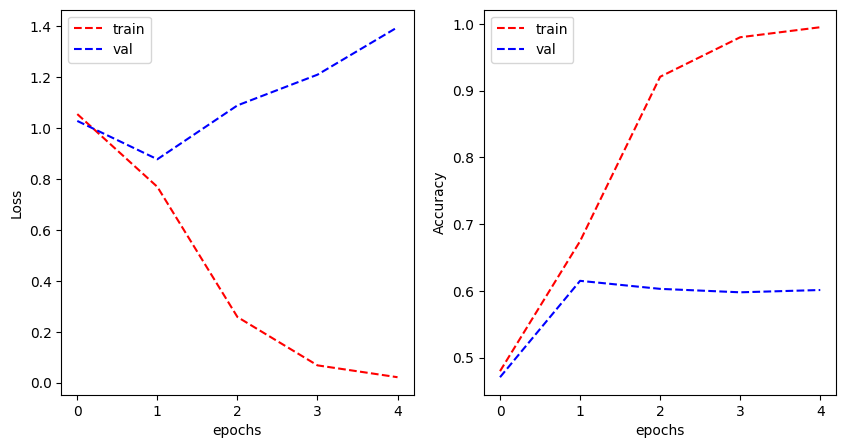

In [185]:
graph_plot(history)

In [186]:
from imblearn.over_sampling import RandomOverSampler
from sklearn.utils import shuffle

# Assuming you have a DataFrame named 'data' with columns 'Tweet' and 'Stance'
X = tweet_data_train['Tweet']
y = tweet_data_train['Stance']

# Reshape X to a 2D array with a single column
X = X.values.reshape(-1, 1)

# Create a RandomOverSampler instance
oversampler = RandomOverSampler(random_state=42)

# Apply oversampling to balance the dataset
X_resampled, y_resampled = oversampler.fit_resample(X, y)

# Reshape X_resampled back to 1D
X_resampled = X_resampled.flatten()

# Create a new balanced DataFrame
balanced_data = pd.DataFrame({'Tweet': X_resampled, 'Stance': y_resampled})

# Shuffle the dataset to avoid any order bias
balanced_data = shuffle(balanced_data, random_state=42)

# Now, 'balanced_data' contains the balanced dataset


In [187]:
balanced_data['Stance'].value_counts()

1    1395
2    1395
0    1395
Name: Stance, dtype: int64

In [188]:
from imblearn.over_sampling import RandomOverSampler
from sklearn.utils import shuffle

# Assuming you have a DataFrame named 'data' with columns 'Tweet', 'Stance', and 'Target'
X = tweet_data_train[['Tweet', 'Target']]
y = tweet_data_train['Stance']

# Create a RandomOverSampler instance
oversampler = RandomOverSampler(random_state=42)

# Apply oversampling to balance the dataset
X_resampled, y_resampled = oversampler.fit_resample(X, y)

# Create a new balanced DataFrame with 'Tweet', 'Target', and 'Stance' columns
balanced_data = pd.DataFrame({'Tweet': X_resampled['Tweet'], 'Target': X_resampled['Target'], 'Stance': y_resampled})

# Shuffle the dataset to avoid any order bias
balanced_data = shuffle(balanced_data, random_state=42)

# Now, 'balanced_data' contains the balanced dataset with 'Tweet', 'Target', and 'Stance' columns



In [189]:
balanced_data.head()

Tweet  \
3013  envreddit  surprise with this blindspotting ha...   
3663  what  wrong with you people women with self re...   
2948  you have not   indifferent  those children who...   
96    docjp pressure its their job and they are fail...   
2282  shes not  woman shes  politician whyimnotvotin...   

                                Target  Stance  
3013  Climate Change is a Real Concern       1  
3663                 Feminist Movement       2  
2948                           Atheism       1  
96            Legalization of Abortion       1  
2282                   Hillary Clinton       0

# Transfer Learning

## With Glove 6 Billion

In [190]:
file = open('/content/drive/MyDrive/Deep_Learning/StanceDataset/StanceDataset/glove.6B.300d.txt', encoding='utf-8')

glove_vectors = dict()
for line in file:
  values = line.split()
  word = values[0]
  features = np.asarray(values[1:])
  glove_vectors[word] = features

file.close()

In [191]:
embedding_dim = 300
E_T = np.zeros((len(word_index) + 1, embedding_dim))
for word, i in word_index.items():
    embedding_vector = glove_vectors.get(word)
    if embedding_vector is not None:
        E_T[i] = embedding_vector

In [192]:
from tensorflow.keras.layers import Dense, Embedding, GRU, LSTM, Bidirectional
from tensorflow.keras.models import Sequential

embedding_layer_TL = Embedding(len(word_index) + 1,
                            embedding_dim,
                            weights=[E_T],
                            input_length=220,
                            trainable=False)

model_glove_TL_6300 = Sequential()
model_glove_TL_6300.add(embedding_layer_TL)
model_glove_TL_6300.add(Bidirectional(LSTM(units=32,  dropout=0.2, recurrent_dropout=0.25)))
model_glove_TL_6300.add(Dense(64, activation='relu'))
model_glove_TL_6300.add(Dense(3, activation='softmax'))

model_glove_TL_6300.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['categorical_accuracy'])

print(model_glove_TL_6300.summary())

Model: "sequential_12"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_9 (Embedding)     (None, 220, 300)          2718000   
                                                                 
 bidirectional_12 (Bidirect  (None, 64)                85248     
 ional)                                                          
                                                                 
 dense_24 (Dense)            (None, 64)                4160      
                                                                 
 dense_25 (Dense)            (None, 3)                 195       
                                                                 
Total params: 2807603 (10.71 MB)
Trainable params: 89603 (350.01 KB)
Non-trainable params: 2718000 (10.37 MB)
_________________________________________________________________
None


In [193]:
history = model_glove_TL_6300.fit(X_train_pad, y_train, batch_size=32, epochs=5, validation_data=(X_val_pad, y_val), verbose=1)

Epoch 1/5
73/73 [==============================] - 78s 994ms/step - loss: 1.0403 - categorical_accuracy: 0.4756 - val_loss: 1.0401 - val_categorical_accuracy: 0.4777
Epoch 2/5
73/73 [==============================] - 72s 985ms/step - loss: 0.9501 - categorical_accuracy: 0.5420 - val_loss: 1.0050 - val_categorical_accuracy: 0.5464
Epoch 3/5
73/73 [==============================] - 72s 988ms/step - loss: 0.8771 - categorical_accuracy: 0.5991 - val_loss: 0.9026 - val_categorical_accuracy: 0.5842
Epoch 4/5
73/73 [==============================] - 71s 978ms/step - loss: 0.8086 - categorical_accuracy: 0.6419 - val_loss: 0.8902 - val_categorical_accuracy: 0.5911
Epoch 5/5
73/73 [==============================] - 71s 979ms/step - loss: 0.7504 - categorical_accuracy: 0.6741 - val_loss: 0.9013 - val_categorical_accuracy: 0.5997


In [194]:
accuracy(model_glove_TL_6300,history)

Training Loss for Stance: 0.7504494786262512
Training Stance Accuracy: 0.6740995049476624
Validation Loss for Stance: 0.9013347029685974
Validation Stance Accuracy: 0.599656343460083
61/61 [==============================] - 6s 103ms/step - loss: 1.2742 - categorical_accuracy: 0.4171
[1.2742451429367065, 0.4171399176120758]
Testing Loss for Stance: 1.2742451429367065
Testing Stance Accuracy: 0.4171399176120758


In [195]:
y_pred,y_true=f1_score_system(model_glove_TL_6300)

19/19 [==============================] - 2s 101ms/step
Weighted Precision: 0.5976208347948796
Weighted Recall: 0.5996563573883161
Weighted F1 Score: 0.5907090554175574


In [196]:
from sklearn.metrics import classification_report
report = classification_report(y_true, y_pred)
print(report)

              precision    recall  f1-score   support

           0       0.66      0.74      0.69       274
           1       0.51      0.59      0.55       147
           2       0.58      0.37      0.45       161

    accuracy                           0.60       582
   macro avg       0.58      0.57      0.57       582
weighted avg       0.60      0.60      0.59       582



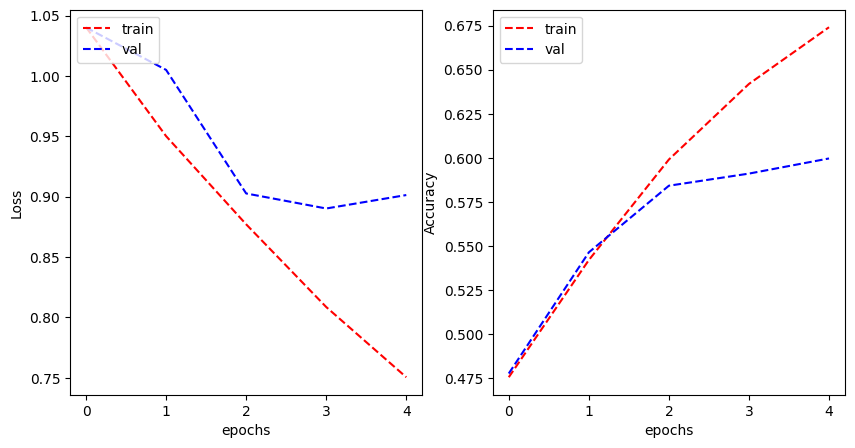

In [197]:
graph_plot(history)

## With Glove 27 Billion

In [198]:
file = open('/content/drive/MyDrive/Deep_Learning/StanceDataset/StanceDataset/glove.twitter.27B.200d.txt', encoding='utf-8')

glove_vectors = dict()
for line in file:
  values = line.split()
  word = values[0]
  features = np.asarray(values[1:])
  glove_vectors[word] = features

file.close()

In [199]:
embedding_dim = 200
E_T = np.zeros((len(word_index) + 1, embedding_dim))
for word, i in word_index.items():
    embedding_vector = glove_vectors.get(word)
    if embedding_vector is not None:
        E_T[i] = embedding_vector

In [200]:
from tensorflow.keras.layers import Dense, Embedding, GRU, LSTM, Bidirectional
from tensorflow.keras.models import Sequential

embedding_layer_TL = Embedding(len(word_index) + 1,
                            embedding_dim,
                            weights=[E_T],
                            input_length=220,
                            trainable=False)

model_glove_TL_27200 = Sequential()
model_glove_TL_27200.add(embedding_layer_TL)
model_glove_TL_27200.add(Bidirectional(LSTM(units=32,  dropout=0.2, recurrent_dropout=0.25)))
model_glove_TL_27200.add(Dense(64, activation='relu'))
model_glove_TL_27200.add(Dense(3, activation='softmax'))

model_glove_TL_27200.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['categorical_accuracy'])

print(model_glove_TL_27200.summary())

Model: "sequential_13"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_10 (Embedding)    (None, 220, 200)          1812000   
                                                                 
 bidirectional_13 (Bidirect  (None, 64)                59648     
 ional)                                                          
                                                                 
 dense_26 (Dense)            (None, 64)                4160      
                                                                 
 dense_27 (Dense)            (None, 3)                 195       
                                                                 
Total params: 1876003 (7.16 MB)
Trainable params: 64003 (250.01 KB)
Non-trainable params: 1812000 (6.91 MB)
_________________________________________________________________
None


In [201]:
history = model_glove_TL_27200.fit(X_train_pad, y_train, batch_size=32, epochs=5, validation_data=(X_val_pad, y_val), verbose=1)

Epoch 1/5
73/73 [==============================] - 82s 1s/step - loss: 1.0309 - categorical_accuracy: 0.4807 - val_loss: 0.9942 - val_categorical_accuracy: 0.5069
Epoch 2/5
73/73 [==============================] - 74s 1s/step - loss: 0.9621 - categorical_accuracy: 0.5425 - val_loss: 0.9340 - val_categorical_accuracy: 0.5515
Epoch 3/5
73/73 [==============================] - 73s 1s/step - loss: 0.8885 - categorical_accuracy: 0.5952 - val_loss: 0.9243 - val_categorical_accuracy: 0.5859
Epoch 4/5
73/73 [==============================] - 74s 1s/step - loss: 0.8330 - categorical_accuracy: 0.6304 - val_loss: 0.9312 - val_categorical_accuracy: 0.5842
Epoch 5/5
73/73 [==============================] - 74s 1s/step - loss: 0.7933 - categorical_accuracy: 0.6621 - val_loss: 0.8686 - val_categorical_accuracy: 0.6168


In [202]:
accuracy(model_glove_TL_27200,history)

Training Loss for Stance: 0.7932770252227783
Training Stance Accuracy: 0.6620926260948181
Validation Loss for Stance: 0.8685940504074097
Validation Stance Accuracy: 0.6168385148048401
61/61 [==============================] - 6s 106ms/step - loss: 1.2147 - categorical_accuracy: 0.4321
[1.2146583795547485, 0.4321115016937256]
Testing Loss for Stance: 1.2146583795547485
Testing Stance Accuracy: 0.4321115016937256


In [203]:
y_pred,y_true=f1_score_system(model_glove_TL_27200)

19/19 [==============================] - 3s 108ms/step
Weighted Precision: 0.618153497408926
Weighted Recall: 0.6168384879725086
Weighted F1 Score: 0.607323308142847


In [204]:
from sklearn.metrics import classification_report
report = classification_report(y_true, y_pred)
print(report)

              precision    recall  f1-score   support

           0       0.66      0.79      0.72       274
           1       0.50      0.52      0.51       147
           2       0.66      0.42      0.51       161

    accuracy                           0.62       582
   macro avg       0.60      0.57      0.58       582
weighted avg       0.62      0.62      0.61       582



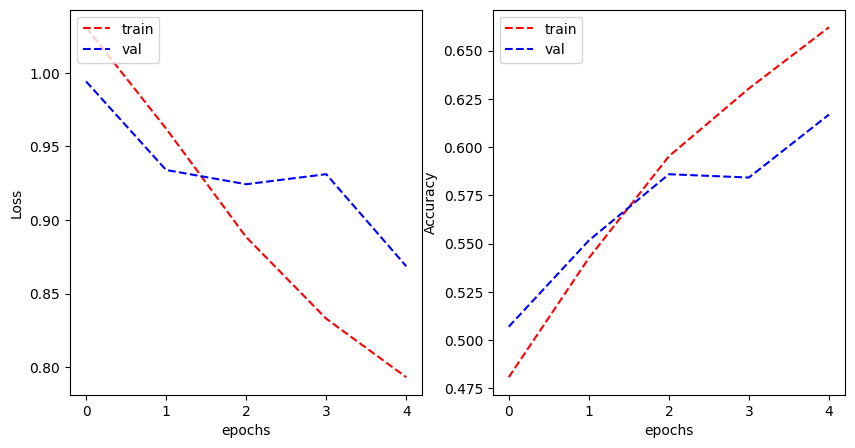

In [205]:
graph_plot(history)

## With Glove 42 Billion

In [206]:
file = open('/content/drive/MyDrive/Deep_Learning/StanceDataset/StanceDataset/glove.42B.300d.txt', encoding='utf-8')

glove_vectors = dict()
for line in file:
  values = line.split()
  word = values[0]
  features = np.asarray(values[1:])
  glove_vectors[word] = features

file.close()

In [207]:
embedding_dim = 300
E_T = np.zeros((len(word_index) + 1, embedding_dim))
for word, i in word_index.items():
    embedding_vector = glove_vectors.get(word)
    if embedding_vector is not None:
        E_T[i] = embedding_vector

In [208]:
from tensorflow.keras.layers import Dense, Embedding, GRU, LSTM, Bidirectional
from tensorflow.keras.models import Sequential

embedding_layer_TL = Embedding(len(word_index) + 1,
                            embedding_dim,
                            weights=[E_T],
                            input_length=220,
                            trainable=False)

model_glove_TL_42300 = Sequential()
model_glove_TL_42300.add(embedding_layer_TL)
model_glove_TL_42300.add(Bidirectional(LSTM(units=32,  dropout=0.2, recurrent_dropout=0.25)))
model_glove_TL_42300.add(Dense(64, activation='relu'))
model_glove_TL_42300.add(Dense(3, activation='softmax'))

model_glove_TL_42300.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['categorical_accuracy'])

print(model_glove_TL_42300.summary())

Model: "sequential_14"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_11 (Embedding)    (None, 220, 300)          2718000   
                                                                 
 bidirectional_14 (Bidirect  (None, 64)                85248     
 ional)                                                          
                                                                 
 dense_28 (Dense)            (None, 64)                4160      
                                                                 
 dense_29 (Dense)            (None, 3)                 195       
                                                                 
Total params: 2807603 (10.71 MB)
Trainable params: 89603 (350.01 KB)
Non-trainable params: 2718000 (10.37 MB)
_________________________________________________________________
None


In [209]:
history = model_glove_TL_42300.fit(X_train_pad, y_train, batch_size=32, epochs=5, validation_data=(X_val_pad, y_val), verbose=1)

Epoch 1/5
73/73 [==============================] - 79s 999ms/step - loss: 1.0309 - categorical_accuracy: 0.4768 - val_loss: 0.9804 - val_categorical_accuracy: 0.5309
Epoch 2/5
73/73 [==============================] - 73s 995ms/step - loss: 0.9293 - categorical_accuracy: 0.5635 - val_loss: 0.8967 - val_categorical_accuracy: 0.5825
Epoch 3/5
73/73 [==============================] - 73s 993ms/step - loss: 0.8350 - categorical_accuracy: 0.6252 - val_loss: 0.8495 - val_categorical_accuracy: 0.6306
Epoch 4/5
73/73 [==============================] - 72s 989ms/step - loss: 0.7785 - categorical_accuracy: 0.6634 - val_loss: 0.8479 - val_categorical_accuracy: 0.6323
Epoch 5/5
73/73 [==============================] - 73s 995ms/step - loss: 0.7202 - categorical_accuracy: 0.6908 - val_loss: 0.8325 - val_categorical_accuracy: 0.6271


In [210]:
accuracy(model_glove_TL_42300,history)

Training Loss for Stance: 0.7201716303825378
Training Stance Accuracy: 0.6908233165740967
Validation Loss for Stance: 0.8324509263038635
Validation Stance Accuracy: 0.6271477937698364
61/61 [==============================] - 6s 104ms/step - loss: 1.2967 - categorical_accuracy: 0.3918
[1.2967060804367065, 0.3918430507183075]
Testing Loss for Stance: 1.2967060804367065
Testing Stance Accuracy: 0.3918430507183075


In [211]:
y_pred,y_true=f1_score_system(model_glove_TL_42300)

19/19 [==============================] - 2s 102ms/step
Weighted Precision: 0.6245643551384438
Weighted Recall: 0.627147766323024
Weighted F1 Score: 0.6229532587765104


In [212]:
from sklearn.metrics import classification_report
report = classification_report(y_true, y_pred)
print(report)

              precision    recall  f1-score   support

           0       0.69      0.74      0.71       274
           1       0.55      0.61      0.58       147
           2       0.58      0.45      0.51       161

    accuracy                           0.63       582
   macro avg       0.61      0.60      0.60       582
weighted avg       0.62      0.63      0.62       582



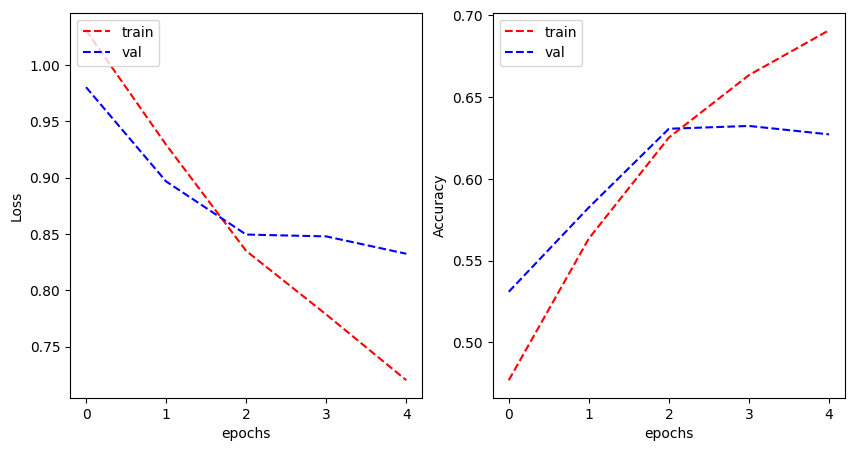

In [213]:
graph_plot(history)

# Data Augumentation

In [214]:
from imblearn.over_sampling import RandomOverSampler
from sklearn.utils import shuffle

# Assuming you have a DataFrame named 'data' with columns 'Tweet', 'Stance', and 'Target'
X = tweet_data_train[['Tweet', 'Target']]
y = tweet_data_train['Stance']

# Create a RandomOverSampler instance
oversampler = RandomOverSampler(random_state=42)

# Apply oversampling to balance the dataset
X_resampled, y_resampled = oversampler.fit_resample(X, y)

# Create a new balanced DataFrame with 'Tweet', 'Target', and 'Stance' columns
balanced_data = pd.DataFrame({'Tweet': X_resampled['Tweet'], 'Target': X_resampled['Target'], 'Stance': y_resampled})

# Shuffle the dataset to avoid any order bias
balanced_data = shuffle(balanced_data, random_state=42)

In [215]:
balanced_data['Stance'].value_counts()

1    1395
2    1395
0    1395
Name: Stance, dtype: int64

In [216]:
word_index,X_train_pad,y_train,X_train_pad_sampled,y_train_sampled,X_val_pad,y_val=data_loader_train(balanced_data)

[[3254, 1395, 10, 12, 3255, 35, 111, 736, 29, 108, 3256, 1396, 3257, 1], [18, 142, 10, 4, 23, 19, 10, 673, 234, 58, 3258, 9, 82, 813, 80, 94, 1198, 1], [4, 9, 8, 3259, 181, 102, 27, 7, 3260, 2, 2235, 20, 3, 4, 7, 54, 1717, 425, 127, 1], [5038, 908, 14, 32, 332, 3, 20, 7, 5039, 5040, 1199, 2, 1718, 20, 123, 187, 814, 2236, 426], [164, 8, 68, 164, 1397, 618, 3261, 358, 5041, 1], [6, 450, 3262, 80, 2237, 5, 3263, 3264, 403, 1], [1398, 1200, 2, 619, 427, 49, 1399, 585, 1201, 620, 187, 1039, 3, 737, 1], [1040, 5042, 2, 225, 540, 5043, 1], [2238, 2239, 1719, 346, 2240, 1720, 28, 479, 12, 347, 28, 451, 198, 3, 1400, 7, 541, 1], [1721, 909, 542, 2, 909, 2, 815, 1401, 1041, 1], [170, 73, 7, 103, 73, 3, 103, 73, 7, 1402, 25, 3265, 1], [130, 4, 13, 42, 586, 910, 1042, 1722, 738, 5044, 5045, 5046, 1], [5047, 3266, 2, 226, 44, 5048, 1], [2241, 2242, 2243, 2244, 2245, 2246, 2247, 2248, 2249, 739, 22, 1], [37, 13, 1403, 3267, 2, 49, 3268, 8, 316, 280, 3269, 1723, 911, 1], [912, 16, 379, 37, 31, 1202,

In [217]:
X_test_pad,y_test,X_test_pad_sampled,y_test_sampled=data_loader_test(balanced_data)

[[3254, 1395, 10, 12, 3255, 35, 111, 736, 29, 108, 3256, 1396, 3257, 1], [18, 142, 10, 4, 23, 19, 10, 673, 234, 58, 3258, 9, 82, 813, 80, 94, 1198, 1], [4, 9, 8, 3259, 181, 102, 27, 7, 3260, 2, 2235, 20, 3, 4, 7, 54, 1717, 425, 127, 1], [5038, 908, 14, 32, 332, 3, 20, 7, 5039, 5040, 1199, 2, 1718, 20, 123, 187, 814, 2236, 426], [164, 8, 68, 164, 1397, 618, 3261, 358, 5041, 1], [6, 450, 3262, 80, 2237, 5, 3263, 3264, 403, 1], [1398, 1200, 2, 619, 427, 49, 1399, 585, 1201, 620, 187, 1039, 3, 737, 1], [1040, 5042, 2, 225, 540, 5043, 1], [2238, 2239, 1719, 346, 2240, 1720, 28, 479, 12, 347, 28, 451, 198, 3, 1400, 7, 541, 1], [1721, 909, 542, 2, 909, 2, 815, 1401, 1041, 1], [170, 73, 7, 103, 73, 3, 103, 73, 7, 1402, 25, 3265, 1], [130, 4, 13, 42, 586, 910, 1042, 1722, 738, 5044, 5045, 5046, 1], [5047, 3266, 2, 226, 44, 5048, 1], [2241, 2242, 2243, 2244, 2245, 2246, 2247, 2248, 2249, 739, 22, 1], [37, 13, 1403, 3267, 2, 49, 3268, 8, 316, 280, 3269, 1723, 911, 1], [912, 16, 379, 37, 31, 1202,

In [218]:
file = open('/content/drive/MyDrive/Deep_Learning/StanceDataset/StanceDataset/glove.42B.300d.txt', encoding='utf-8')

glove_vectors = dict()
for line in file:
  values = line.split()
  word = values[0]
  features = np.asarray(values[1:])
  glove_vectors[word] = features

file.close()

In [219]:
embedding_dim = 300
E_T = np.zeros((len(word_index) + 1, embedding_dim))
for word, i in word_index.items():
    embedding_vector = glove_vectors.get(word)
    if embedding_vector is not None:
        E_T[i] = embedding_vector

In [220]:
from tensorflow.keras.layers import Dense, Embedding, GRU, LSTM, Bidirectional
from tensorflow.keras.models import Sequential

embedding_layer_TL = Embedding(len(word_index) + 1,
                            embedding_dim,
                            weights=[E_T],
                            input_length=220,
                            trainable=False)

model_glove_TL_42300 = Sequential()
model_glove_TL_42300.add(embedding_layer_TL)
model_glove_TL_42300.add(Bidirectional(LSTM(units=32,  dropout=0.2, recurrent_dropout=0.25)))
model_glove_TL_42300.add(Dense(64, activation='relu'))
model_glove_TL_42300.add(Dense(3, activation='softmax'))

model_glove_TL_42300.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['categorical_accuracy'])

print(model_glove_TL_42300.summary())

Model: "sequential_15"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_12 (Embedding)    (None, 220, 300)          2718000   
                                                                 
 bidirectional_15 (Bidirect  (None, 64)                85248     
 ional)                                                          
                                                                 
 dense_30 (Dense)            (None, 64)                4160      
                                                                 
 dense_31 (Dense)            (None, 3)                 195       
                                                                 
Total params: 2807603 (10.71 MB)
Trainable params: 89603 (350.01 KB)
Non-trainable params: 2718000 (10.37 MB)
_________________________________________________________________
None


In [221]:
history = model_glove_TL_42300.fit(X_train_pad, y_train, batch_size=32, epochs=5, validation_data=(X_val_pad, y_val), verbose=1)

Epoch 1/5
105/105 [==============================] - 109s 987ms/step - loss: 1.0397 - categorical_accuracy: 0.4462 - val_loss: 0.9772 - val_categorical_accuracy: 0.5436
Epoch 2/5
105/105 [==============================] - 104s 994ms/step - loss: 0.8896 - categorical_accuracy: 0.5995 - val_loss: 0.8997 - val_categorical_accuracy: 0.5818
Epoch 3/5
105/105 [==============================] - 104s 993ms/step - loss: 0.7602 - categorical_accuracy: 0.6714 - val_loss: 0.8351 - val_categorical_accuracy: 0.6165
Epoch 4/5
105/105 [==============================] - 103s 983ms/step - loss: 0.6704 - categorical_accuracy: 0.7237 - val_loss: 0.7930 - val_categorical_accuracy: 0.6428
Epoch 5/5
105/105 [==============================] - 104s 988ms/step - loss: 0.5870 - categorical_accuracy: 0.7652 - val_loss: 0.7673 - val_categorical_accuracy: 0.6714


In [222]:
accuracy(model_glove_TL_42300,history)

Training Loss for Stance: 0.5870208740234375
Training Stance Accuracy: 0.7652329802513123
Validation Loss for Stance: 0.7672659754753113
Validation Stance Accuracy: 0.6714456677436829
130/130 [==============================] - 13s 103ms/step - loss: 0.5309 - categorical_accuracy: 0.7925
[0.5308721661567688, 0.7924710512161255]
Testing Loss for Stance: 0.5308721661567688
Testing Stance Accuracy: 0.7924710512161255


In [223]:
y_pred,y_true=f1_score_system(model_glove_TL_42300)

27/27 [==============================] - 3s 102ms/step
Weighted Precision: 0.6756709556293323
Weighted Recall: 0.6714456391875747
Weighted F1 Score: 0.6679631436493986


In [224]:
from sklearn.metrics import classification_report
report = classification_report(y_true, y_pred)
print(report)

              precision    recall  f1-score   support

           0       0.62      0.58      0.60       288
           1       0.66      0.83      0.74       281
           2       0.75      0.60      0.67       268

    accuracy                           0.67       837
   macro avg       0.68      0.67      0.67       837
weighted avg       0.68      0.67      0.67       837



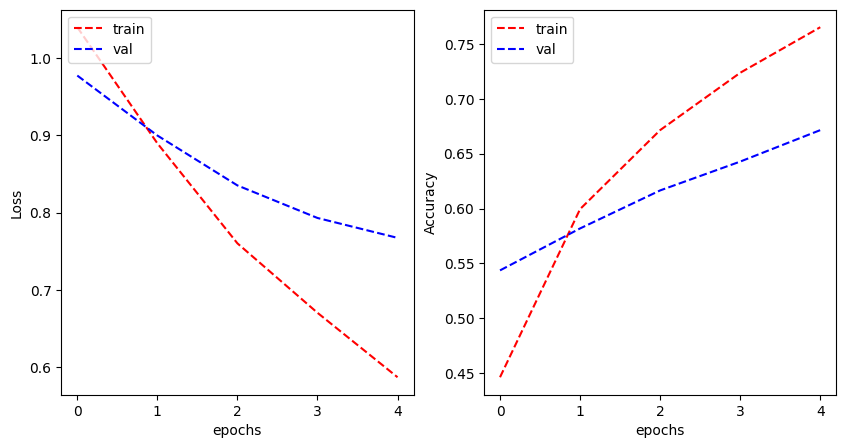

In [225]:
graph_plot(history)

# Hyper Parameter Tunning

## L1 Regularisation

Model: "sequential_16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_13 (Embedding)    (None, 220, 300)          2718000   
                                                                 
 bidirectional_16 (Bidirect  (None, 64)                85248     
 ional)                                                          
                                                                 
 dense_32 (Dense)            (None, 64)                4160      
                                                                 
 dense_33 (Dense)            (None, 3)                 195       
                                                                 
Total params: 2807603 (10.71 MB)
Trainable params: 89603 (350.01 KB)
Non-trainable params: 2718000 (10.37 MB)
_________________________________________________________________
None
Epoch 1/5
105/105 [==============================] - 110s 994ms/step -

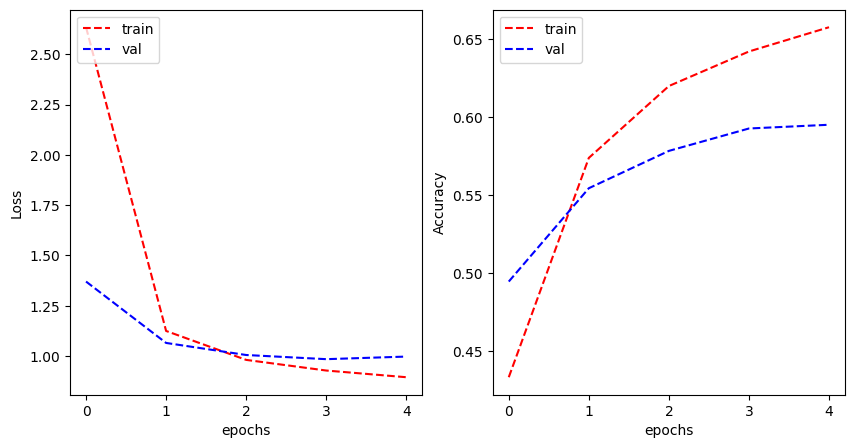

------------------------------------------------------------------------------------------------------------------------------------
Model: "sequential_17"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_13 (Embedding)    (None, 220, 300)          2718000   
                                                                 
 bidirectional_17 (Bidirect  (None, 64)                85248     
 ional)                                                          
                                                                 
 dense_34 (Dense)            (None, 64)                4160      
                                                                 
 dense_35 (Dense)            (None, 3)                 195       
                                                                 
Total params: 2807603 (10.71 MB)
Trainable params: 89603 (350.01 KB)
Non-trainable params: 2718000 (10.37 MB)
________

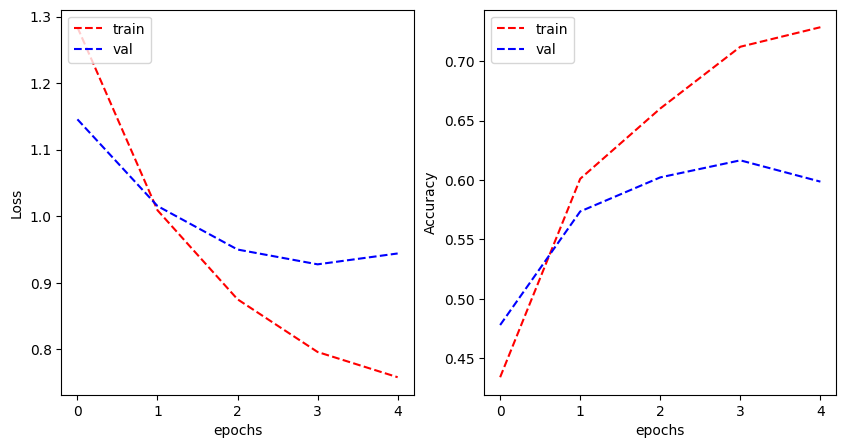

------------------------------------------------------------------------------------------------------------------------------------
Model: "sequential_18"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_13 (Embedding)    (None, 220, 300)          2718000   
                                                                 
 bidirectional_18 (Bidirect  (None, 64)                85248     
 ional)                                                          
                                                                 
 dense_36 (Dense)            (None, 64)                4160      
                                                                 
 dense_37 (Dense)            (None, 3)                 195       
                                                                 
Total params: 2807603 (10.71 MB)
Trainable params: 89603 (350.01 KB)
Non-trainable params: 2718000 (10.37 MB)
________

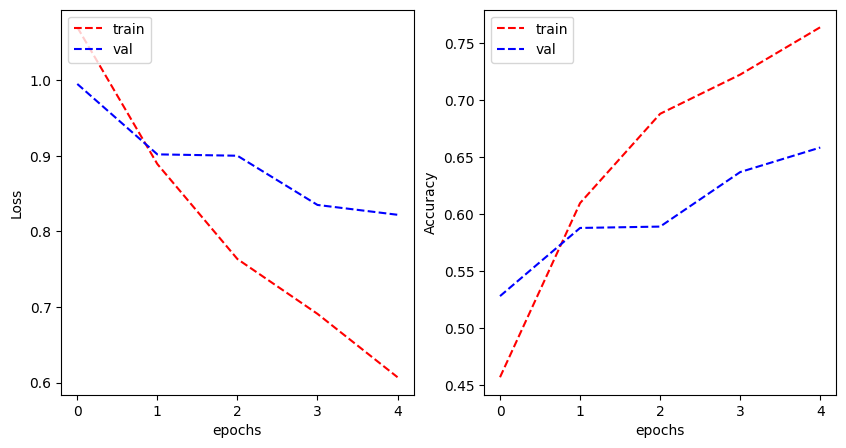

------------------------------------------------------------------------------------------------------------------------------------
Model: "sequential_19"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_13 (Embedding)    (None, 220, 300)          2718000   
                                                                 
 bidirectional_19 (Bidirect  (None, 64)                85248     
 ional)                                                          
                                                                 
 dense_38 (Dense)            (None, 64)                4160      
                                                                 
 dense_39 (Dense)            (None, 3)                 195       
                                                                 
Total params: 2807603 (10.71 MB)
Trainable params: 89603 (350.01 KB)
Non-trainable params: 2718000 (10.37 MB)
________

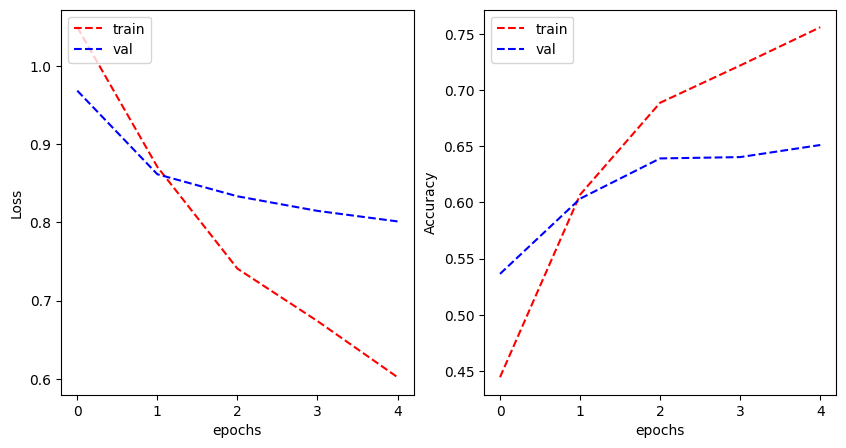

------------------------------------------------------------------------------------------------------------------------------------


In [227]:
regu_list=[0.01,0.001,0.0001,0.00001]
file = open('/content/drive/MyDrive/Deep_Learning/StanceDataset/StanceDataset/glove.42B.300d.txt', encoding='utf-8')

glove_vectors = dict()
for line in file:
  values = line.split()
  word = values[0]
  features = np.asarray(values[1:])
  glove_vectors[word] = features

file.close()
embedding_dim = 300
E_T = np.zeros((len(word_index) + 1, embedding_dim))
for word, i in word_index.items():
    embedding_vector = glove_vectors.get(word)
    if embedding_vector is not None:
        E_T[i] = embedding_vector
from tensorflow.keras.layers import Dense, Embedding, GRU, LSTM, Bidirectional
from tensorflow.keras.models import Sequential

embedding_layer_TL = Embedding(len(word_index) + 1,
                            embedding_dim,
                            weights=[E_T],
                            input_length=220,
                            trainable=False)
for regi in regu_list:
  model_glove_TL_42300 = Sequential()
  model_glove_TL_42300.add(embedding_layer_TL)
  model_glove_TL_42300.add(Bidirectional(LSTM(units=32,  dropout=0.2, recurrent_dropout=0.25,kernel_regularizer=tf.keras.regularizers.l2(regi))))
  model_glove_TL_42300.add(Dense(64, activation='relu',kernel_regularizer=tf.keras.regularizers.l2(regi)))
  model_glove_TL_42300.add(Dense(3, activation='softmax'))

  model_glove_TL_42300.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['categorical_accuracy'])

  print(model_glove_TL_42300.summary())
  history = model_glove_TL_42300.fit(X_train_pad, y_train, batch_size=32, epochs=5, validation_data=(X_val_pad, y_val), verbose=1)
  accuracy(model_glove_TL_42300,history)
  y_pred,y_true=f1_score_system(model_glove_TL_42300)
  from sklearn.metrics import classification_report
  report = classification_report(y_true, y_pred)
  print(report)
  graph_plot(history)
  print("------------------------------------------------------------------------------------------------------------------------------------")

## Different Batch Size

Model: "sequential_20"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_14 (Embedding)    (None, 220, 300)          2718000   
                                                                 
 bidirectional_20 (Bidirect  (None, 64)                85248     
 ional)                                                          
                                                                 
 dense_40 (Dense)            (None, 64)                4160      
                                                                 
 dense_41 (Dense)            (None, 3)                 195       
                                                                 
Total params: 2807603 (10.71 MB)
Trainable params: 89603 (350.01 KB)
Non-trainable params: 2718000 (10.37 MB)
_________________________________________________________________
None
Epoch 1/5
419/419 [==============================] - 431s 1s/step - lo

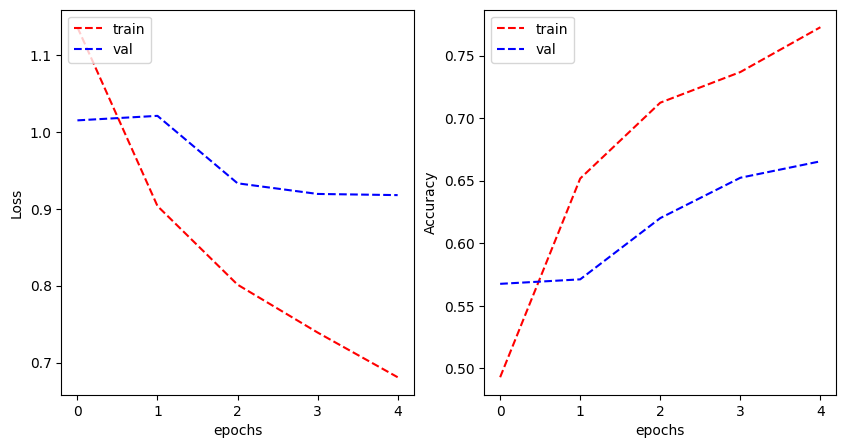

------------------------------------------------------------------------------------------------------------------------------------
Model: "sequential_21"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_14 (Embedding)    (None, 220, 300)          2718000   
                                                                 
 bidirectional_21 (Bidirect  (None, 64)                85248     
 ional)                                                          
                                                                 
 dense_42 (Dense)            (None, 64)                4160      
                                                                 
 dense_43 (Dense)            (None, 3)                 195       
                                                                 
Total params: 2807603 (10.71 MB)
Trainable params: 89603 (350.01 KB)
Non-trainable params: 2718000 (10.37 MB)
________

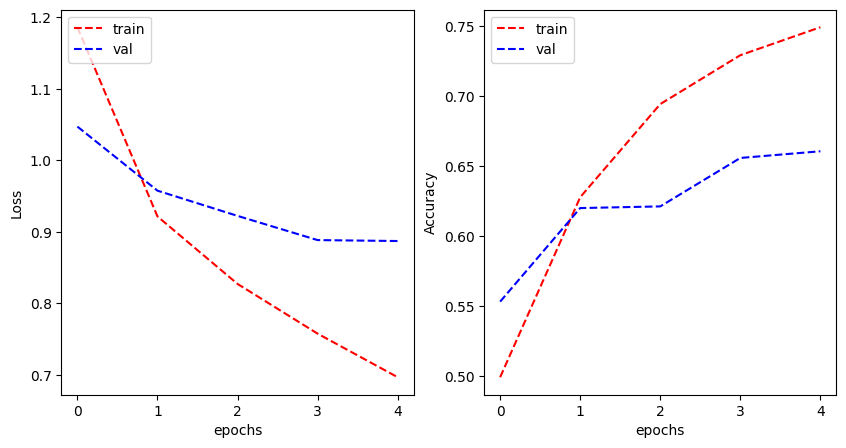

------------------------------------------------------------------------------------------------------------------------------------
Model: "sequential_22"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_14 (Embedding)    (None, 220, 300)          2718000   
                                                                 
 bidirectional_22 (Bidirect  (None, 64)                85248     
 ional)                                                          
                                                                 
 dense_44 (Dense)            (None, 64)                4160      
                                                                 
 dense_45 (Dense)            (None, 3)                 195       
                                                                 
Total params: 2807603 (10.71 MB)
Trainable params: 89603 (350.01 KB)
Non-trainable params: 2718000 (10.37 MB)
________

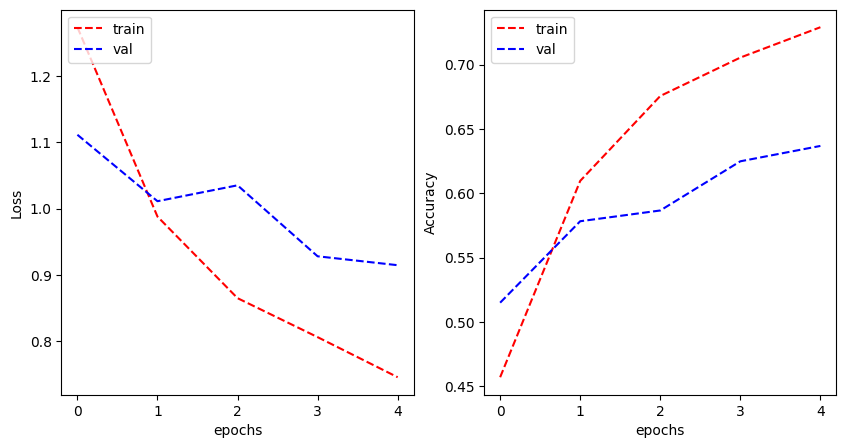

------------------------------------------------------------------------------------------------------------------------------------


In [228]:
batch_list=[8,16,32]
file = open('/content/drive/MyDrive/Deep_Learning/StanceDataset/StanceDataset/glove.42B.300d.txt', encoding='utf-8')

glove_vectors = dict()
for line in file:
  values = line.split()
  word = values[0]
  features = np.asarray(values[1:])
  glove_vectors[word] = features

file.close()
regi=0.001
embedding_dim = 300
E_T = np.zeros((len(word_index) + 1, embedding_dim))
for word, i in word_index.items():
    embedding_vector = glove_vectors.get(word)
    if embedding_vector is not None:
        E_T[i] = embedding_vector
from tensorflow.keras.layers import Dense, Embedding, GRU, LSTM, Bidirectional
from tensorflow.keras.models import Sequential

embedding_layer_TL = Embedding(len(word_index) + 1,
                            embedding_dim,
                            weights=[E_T],
                            input_length=220,
                            trainable=False)
for batch in batch_list:
  model_glove_TL_42300 = Sequential()
  model_glove_TL_42300.add(embedding_layer_TL)
  model_glove_TL_42300.add(Bidirectional(LSTM(units=32,  dropout=0.2, recurrent_dropout=0.25,kernel_regularizer=tf.keras.regularizers.l2(regi))))
  model_glove_TL_42300.add(Dense(64, activation='relu',kernel_regularizer=tf.keras.regularizers.l2(regi)))
  model_glove_TL_42300.add(Dense(3, activation='softmax'))

  model_glove_TL_42300.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['categorical_accuracy'])

  print(model_glove_TL_42300.summary())
  history = model_glove_TL_42300.fit(X_train_pad, y_train, batch_size=batch, epochs=5, validation_data=(X_val_pad, y_val), verbose=1)
  accuracy(model_glove_TL_42300,history)
  y_pred,y_true=f1_score_system(model_glove_TL_42300)
  from sklearn.metrics import classification_report
  report = classification_report(y_true, y_pred)
  print(report)
  graph_plot(history)
  print("------------------------------------------------------------------------------------------------------------------------------------")

## Otimization Algorithm

In [229]:
# Listing the optimizers
optims = [tf.keras.optimizers.Adam(), tf.keras.optimizers.Adadelta(),
          tf.keras.optimizers.Adagrad(), tf.keras.optimizers.RMSprop(),
          tf.keras.optimizers.SGD()]
file = open('/content/drive/MyDrive/Deep_Learning/StanceDataset/StanceDataset/glove.42B.300d.txt', encoding='utf-8')

glove_vectors = dict()
for line in file:
  values = line.split()
  word = values[0]
  features = np.asarray(values[1:])
  glove_vectors[word] = features

file.close()
regi=0.001
batch=32
embedding_dim = 300
E_T = np.zeros((len(word_index) + 1, embedding_dim))
for word, i in word_index.items():
    embedding_vector = glove_vectors.get(word)
    if embedding_vector is not None:
        E_T[i] = embedding_vector
from tensorflow.keras.layers import Dense, Embedding, GRU, LSTM, Bidirectional
from tensorflow.keras.models import Sequential

embedding_layer_TL = Embedding(len(word_index) + 1,
                            embedding_dim,
                            weights=[E_T],
                            input_length=220,
                            trainable=False)
for opti in optims:
  model_glove_TL_42300 = Sequential()
  model_glove_TL_42300.add(embedding_layer_TL)
  model_glove_TL_42300.add(Bidirectional(LSTM(units=32,  dropout=0.2, recurrent_dropout=0.25,kernel_regularizer=tf.keras.regularizers.l2(regi))))
  model_glove_TL_42300.add(Dense(64, activation='relu',kernel_regularizer=tf.keras.regularizers.l2(regi)))
  model_glove_TL_42300.add(Dense(3, activation='softmax'))

  model_glove_TL_42300.compile(loss='categorical_crossentropy', optimizer=opti, metrics=['categorical_accuracy'])

  print(model_glove_TL_42300.summary())
  history = model_glove_TL_42300.fit(X_train_pad, y_train, batch_size=batch, epochs=5, validation_data=(X_val_pad, y_val), verbose=1)
  accuracy(model_glove_TL_42300,history)
  y_pred,y_true=f1_score_system(model_glove_TL_42300)
  from sklearn.metrics import classification_report
  report = classification_report(y_true, y_pred)
  print(report)
  graph_plot(history)
  print("------------------------------------------------------------------------------------------------------------------------------------")

ValueError: ignored

## Learning Rate

In [ ]:
learning_rate=[0.001,0.1,0.01]
file = open('/content/drive/MyDrive/Deep_Learning/StanceDataset/StanceDataset/glove.42B.300d.txt', encoding='utf-8')

glove_vectors = dict()
for line in file:
  values = line.split()
  word = values[0]
  features = np.asarray(values[1:])
  glove_vectors[word] = features

file.close()
regi=0.001
batch=
embedding_dim = 200
E_T = np.zeros((len(word_index) + 1, embedding_dim))
for word, i in word_index.items():
    embedding_vector = glove_vectors.get(word)
    if embedding_vector is not None:
        E_T[i] = embedding_vector
from tensorflow.keras.layers import Dense, Embedding, GRU, LSTM, Bidirectional
from tensorflow.keras.models import Sequential

embedding_layer_TL = Embedding(len(word_index) + 1,
                            embedding_dim,
                            weights=[E_T],
                            input_length=220,
                            trainable=False)
for lr in learning_rate:
  model_glove_TL_42300 = Sequential()
  model_glove_TL_42300.add(embedding_layer_TL)
  model_glove_TL_42300.add(Bidirectional(LSTM(units=32,  dropout=0.2, recurrent_dropout=0.25,kernel_regularizer=tf.keras.regularizers.l2(regi))))
  model_glove_TL_42300.add(Dense(64, activation='relu',kernel_regularizer=tf.keras.regularizers.l2(regi)))
  model_glove_TL_42300.add(Dense(3, activation='softmax'))

  model_glove_TL_42300.compile(loss='categorical_crossentropy', optimizer=tf.keras.optimizers.RMSprop(learning_rate=lr), metrics=['categorical_accuracy'])

  print(model_glove_TL_42300.summary())
  history = model_glove_TL_42300.fit(X_train_pad, y_train, batch_size=32, epochs=5, validation_data=(X_val_pad, y_val), verbose=1)
  accuracy(model_glove_TL_42300,history)
  y_pred,y_true=f1_score_system(model_glove_TL_42300)
  from sklearn.metrics import classification_report
  report = classification_report(y_true, y_pred)
  print(report)
  graph_plot(history)
  print("------------------------------------------------------------------------------------------------------------------------------------")

## Epoch

In [ ]:
epoch_list = [10,25,100]
file = open('/content/drive/MyDrive/Deep_Learning/StanceDataset/StanceDataset/glove.42B.300d.txt', encoding='utf-8')

glove_vectors = dict()
for line in file:
  values = line.split()
  word = values[0]
  features = np.asarray(values[1:])
  glove_vectors[word] = features

file.close()
regi=0.001
batch=
embedding_dim = 200
E_T = np.zeros((len(word_index) + 1, embedding_dim))
for word, i in word_index.items():
    embedding_vector = glove_vectors.get(word)
    if embedding_vector is not None:
        E_T[i] = embedding_vector
from tensorflow.keras.layers import Dense, Embedding, GRU, LSTM, Bidirectional
from tensorflow.keras.models import Sequential

embedding_layer_TL = Embedding(len(word_index) + 1,
                            embedding_dim,
                            weights=[E_T],
                            input_length=220,
                            trainable=False)
for epoch in epoch_list:
  model_glove_TL_42300 = Sequential()
  model_glove_TL_42300.add(embedding_layer_TL)
  model_glove_TL_42300.add(Bidirectional(LSTM(units=32,  dropout=0.2, recurrent_dropout=0.25,kernel_regularizer=tf.keras.regularizers.l2(regi))))
  model_glove_TL_42300.add(Dense(64, activation='relu',kernel_regularizer=tf.keras.regularizers.l2(regi)))
  model_glove_TL_42300.add(Dense(3, activation='softmax'))

  model_glove_TL_42300.compile(loss='categorical_crossentropy', optimizer=tf.keras.optimizers.RMSprop(learning_rate=lr), metrics=['categorical_accuracy'])

  print(model_glove_TL_42300.summary())
  history = model_glove_TL_42300.fit(X_train_pad, y_train, batch_size=32, epochs=epoch, validation_data=(X_val_pad, y_val), verbose=1)
  accuracy(model_glove_TL_42300,history)
  y_pred,y_true=f1_score_system(model_glove_TL_42300)
  from sklearn.metrics import classification_report
  report = classification_report(y_true, y_pred)
  print(report)
  graph_plot(history)
  print("------------------------------------------------------------------------------------------------------------------------------------")

# Final Model